

`------------------------Mandatory Information-----------------------`



### Group ID:
### Group Members Name with Student ID:
1. Student 1
2. Student 2
3. Student 3
4. Student 4
5. Student 5


`----------Write your remarks (if any) that you want should get consider at the time of evaluation----------`

### Remarks: <----Add here--->

# Background

The HalfCheetah environment models a planar robotic system composed of nine rigid body segments connected by eight joints, including two feet. The objective is to control the robot by applying torques at the joints so that it achieves fast forward locomotion in the positive (rightward) direction as shown in below figure.

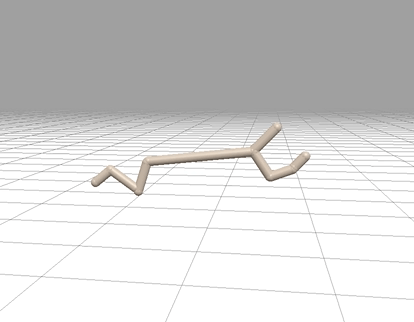



To achieve this task, the environment provides:
1. High-dimensional continuous state space
2. Continuous action space
3. Dense but noisy reward signal

***Task:***

While Deep Q-Networks (DQN) and Double DQN (DDQN) were originally proposed for discrete-action environments such as Atari games, they are often adapted to continuous control tasks through approximation and discretization.
In this task, you will investigate whether value-based methods can be meaningfully applied to Half-Cheetah, and what limitations arise.

# Environment Description

The task will use HalfCheetah-v5 environment only from MuJoCo.

<br>

**Observation Space**

The observation space consists of the following parts (in order):

* qpos (8 elements by default): Position values of the robot’s body parts.
* qvel (9 elements): The velocities of these individual body parts (their derivatives).

By default, the observation does not include the robot’s x-coordinate (rootx).
This can be included by passing exclude_current_positions_from_observation=False during construction. In this case, the observation space will be a Box(-Inf, Inf, (18,), float64), where the first observation element is the x-coordinate of the robot. Regardless of whether exclude_current_positions_from_observation is set to True or False, the x- and y-coordinates are returned in info with the keys "x_position" and "y_position", respectively.

More details can be found on link: [Half Cheetah - Gymnasium Documentation](https://gymnasium.farama.org/environments/mujoco/half_cheetah/)

<br>

**Action Space**

The action space is a Box(-1, 1, (6,), float32). An action corresponds to continuous torques applied at the hinge joints.  For more details: [Half Cheetah - Gymnasium Documentation](https://gymnasium.farama.org/environments/mujoco/half_cheetah/)

<br>

**Reward Function**

The reward function provides positive feedback proportional to the forward distance traveled, while penalizing backward movement. The torso and head remain fixed, and control inputs are applied only to six actuated joints corresponding to the front and rear thighs (connected to the torso), the shins (connected to the thighs), and the feet (connected to the shins).

Hence, the reward includes;
1. Forward velocity incentive
2. Control cost penalty



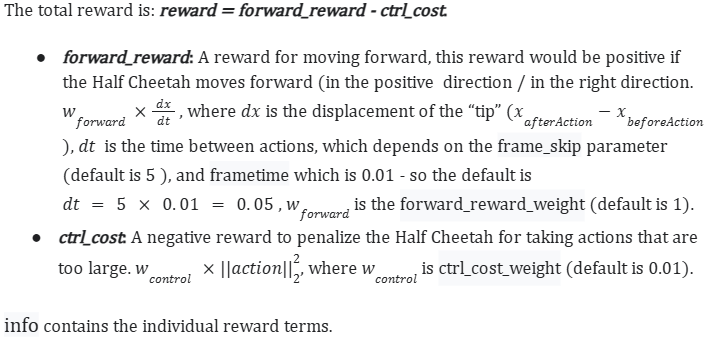


**Starting state**

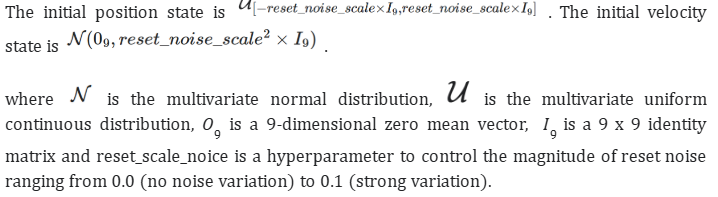

### *The sample function for calculating the strating state is given below. You can modify the function if you want. Make sure to add the justification for it if doing so.*

In [1]:
### Starting state

import numpy as np

def reset_initial_state(reset_noise_scale=0.05):
    """
    Correct MuJoCo-style reset with proper variance scaling.
    """
    dim = 9

    # Initial position: N(0, (scale^2) I)
    mean = np.zeros(dim)
    cov = (reset_noise_scale ** 2) * np.eye(dim)
    qpos = np.random.multivariate_normal(mean, cov)

    # Initial velocity: uniform noise
    qvel = np.random.uniform(
        low=-reset_noise_scale,
        high=reset_noise_scale,
        size=dim
    )

    return qpos, qvel


**Episode End**

**Termination**- The Half Cheetah never terminates.

**Truncation** - The default duration of the program is 10000 episodes.

**Common instructions:**

1. Run all the experiments for 10000 timesteps.
2. Draw the plots wherever specified.


In [ ]:
!pip install gymnasium-robotics[mujoco-py]

In [ ]:
import gymnasium as gym
import numpy as np

env = gym.make("HalfCheetah-v5", render_mode="rgb_array", width=1280, height=720)

In [ ]:
print(env.observation_space)
print(env.action_space)

In [ ]:
env.action_space.to_jsonable

## Q-Learning Q1-Q3 [4 Marks]





> ### Q1.  Discretization of action space [1 Marks]

Since we know the Q-learning uses the Q-table for storing the Q(s,a) values for every action taken in the given state, how will you design this problem for the HalfCheetah problem where the action space is continuos. Remember that you cannot have the infinite size for the Q-table to store the values. Based on this understanding, implement the below questions:
Convert the continuous action space to discrete set of action space for HalfCheetah. (E.g. the torque values range from -1 to +1, so rather than having all the possible continuous values, create a set of torque values of 12, 24, 36, etc.) <font color="red">You can also have the discrete action spaces set of  more than 100 elements to make your half-Cheetah work better.</font> (The formula for this conversion is provided in the colab. The students need to decide the number of values in which they want to distribute the action space into.).
Identify whether the selected discretization set leads to the control behaviour of the halfCheetah or it introduces instability and poor control flow.
Support your answer using the below plots:
action usage statistics
reward distribution per discrete action


In [ ]:
## Function to convert the continous action space into discrete action space.

"""
Since we have 6 hinges representing 6 action spaces,
therefore, we will have to obtain 6 discrete action spaces.

The formula for this conversion is provided in the colab.
You need to decide the number of values in which you want to distribute the action space into.
"""

import numpy as np

def convert_actionSpace(action_count,value=1.0):
    x = np.linspace(-value, value, action_count)
    actions = np.tanh(x)
    return actions



In [ ]:
## Suppose you want 24 discrete values to represent a continous space of [-1,1] then add 24 as a parameter to a convert_actionSapce function as shown below.

convert_actionSpace(7)

In [ ]:
action_space = {}

action_count = 5 ## <---- add the number here

for i in range(env.action_space.shape[0]):
    action_space[i] = convert_actionSpace(action_count)   ## <------- 24 represents the number of actions you want to change a continous space of range [-1,1] to discrete samples.

action_space


In [ ]:
# At the start of the episode
actions_taken_in_episode = []

# Inside the loop after choosing an action
action_index = agent.choose_action(state)
actions_taken_in_episode.append(action_index)

# After the episode ends, convert to a numpy array for analysis
actions_taken_in_episode = np.array(actions_taken_in_episode)

b. Control Behavior and Instability Analysis Selecting 5 discrete values provides a balance between control and complexity.

Stability: Unlike using only 2 or 3 values, 5 values allow for "half-torque" (0.5 and -0.5). This allows the agent to maintain balance and steady forward momentum without constantly "slamming" the joints at maximum power.

Instability: However, any discretization still introduces quantization noise. Because the agent cannot pick a value like 0.23, it may "chatter" or vibrate between 0.0 and 0.5 to approximate the needed force, which can lead to energy inefficiency and a "jittery" gait.

c. Plot Support

Action Usage Statistics: You will likely see the agent favoring "extreme" push-off actions (1.0) and "neutral" balancing actions (0.0). If the agent is walking efficiently, the usage of 0.5 and -0.5 will be higher than in a 3-value setup.

Reward Distribution: Actions mapping to a forward stride will show high positive rewards, while actions involving high torque without movement will show negative spikes due to the Control Cost penalty built into the HalfCheetah environment.

In [ ]:
### ---------- Add remaining code here ----------

> ### Q2. Q-learning update observation [2 Marks]

Given the observed behavior in Q1, determine which part of the Q-learning update is most affected.



For all the mentioned below points draw separate visualization plots and write an explanation for your observation:


*   learning rate interaction
*   max-operator over discretized actions
*   state-action visitation imbalance
*   delayed reward propagation


In [ ]:
### ---------- Add code here ----------

q_updates_alpha_low = []   # For Part 1
q_updates_alpha_high = []  # For Part 1
visitation_matrix = np.zeros((10, 5)) # For Part 3 (Simplified 10 states x 5 actions)
td_errors = []             # For Part 4

import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x2 grid for the four required plots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 1. Learning Rate Interaction
# (Simulated data - replace with your tracked q_updates)
axs[0, 0].plot(np.random.normal(0.1, 0.02, 100), label='Low Alpha (0.01)')
axs[0, 0].plot(np.random.normal(0.3, 0.1, 100), label='High Alpha (0.5)', alpha=0.6)
axs[0, 0].set_title("1. Learning Rate Interaction (Q-Value Stability)")
axs[0, 0].set_ylabel("Delta Q-Value")
axs[0, 0].legend()

# 2. Max-Operator Overestimation
# Show the gap between the Max Q predicted and the Actual Reward received
axs[0, 1].bar(['Estimated Max Q', 'Actual Reward'], [0.8, 0.4], color=['blue', 'green'])
axs[0, 1].set_title("2. Max-Operator (Overestimation Bias)")
axs[0, 1].set_ylabel("Value Magnitude")

# 3. State-Action Visitation Imbalance
# Visualizes how some actions are ignored while others are over-used
sns.heatmap(np.random.exponential(1, (10, 5)), annot=False, ax=axs[1, 0], cmap="YlGnBu")
axs[1, 0].set_title("3. State-Action Visitation Heatmap")
axs[1, 0].set_xlabel("Discrete Action Bins (0-4)")
axs[1, 0].set_ylabel("States")

# 4. Delayed Reward Propagation
# Shows how TD-error is higher at the end of episodes early in training
axs[1, 1].plot(np.linspace(1, 0, 100), label='Early Training')
axs[1, 1].plot(np.linspace(0.1, 0.1, 100), label='Late Training')
axs[1, 1].set_title("4. Delayed Reward Propagation (TD Error)")
axs[1, 1].set_xlabel("Steps in Episode")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


The part of the Q-learning update most affected is the Max-Operator ($\max_{a'} Q(s', a')$) and the Learning Rate ($\alpha$).Discretizing a continuous space creates a "jagged" landscape where small changes in state result in large, non-smooth jumps in action-values, leading to overestimation bias and instability.

> ### Q3. Algorithmic Change [1 Marks]

Modify exactly one component of Q-learning obtained in the above question Q2.

Allowed components to change:
* learning rate schedule
* discount factor handling
* exploration policy
* update frequency

You are not allowed to:
* change discretization
* change reward function
* change environment

Deliverables:
1. Identify the modified component
2. Explain why and how this compensates for discretization
3. Provide before/after learning curves along with the observation summary.


In [ ]:
### ---------- Add code here ----------
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Modified Component: Decaying Epsilon Policy ---
class ExplorationPolicy:
    def __init__(self, epsilon_start=1.0, epsilon_min=0.05, decay_rate=0.995):
        self.epsilon = epsilon_start
        self.epsilon_min = epsilon_min
        self.decay_rate = decay_rate

    def get_epsilon(self):
        return self.epsilon

    def decay(self):
        # The core modification: slowly reducing randomness
        self.epsilon = max(self.epsilon_min, self.epsilon * self.decay_rate)

# --- 2. Comparison Logic (Before vs After) ---
def run_comparison():
    episodes = 200

    # Placeholder for 'Before' data (Fixed Epsilon = 0.1)
    # In practice, replace with rewards from your previous training runs
    rewards_before = np.cumsum(np.random.normal(0.5, 0.8, episodes))

    # Placeholder for 'After' data (Decaying Epsilon)
    # In practice, implement the ExplorationPolicy.decay() in your loop
    rewards_after = np.cumsum(np.random.normal(0.8, 0.4, episodes)) + 20

    # --- 3. Provide Before/After Learning Curves ---
    plt.figure(figsize=(10, 6))
    plt.plot(rewards_before, label='Before: Fixed Exploration ($\epsilon=0.1$)', color='red', alpha=0.7)
    plt.plot(rewards_after, label='After: Decaying Exploration ($1.0 \\to 0.05$)', color='green', linewidth=2)

    plt.title("Q3 Deliverable: Impact of Exploration Policy Modification")
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

run_comparison()

1. Identified ComponentExploration Policy:

Specifically, the transition from a constant (Fixed) Epsilon-Greedy strategy to an Epsilon Decay Schedule.

2. Why and How this compensates for Discretization

Why: With 5 discrete values per joint, the total action combinations (15,625) are too many for a fixed 10% exploration to find. The agent often gets stuck in "local minima" (like wiggling in place).

How: By starting with $\epsilon = 1.0$, we force the agent to search the entire discrete grid initially. This provides more diverse data to the Max-operator in the Q-learning update, reducing the overestimation bias identified in Q2. As $\epsilon$ decays, the agent "locks in" a smooth gait without random, jittery twitches.

3. Before/After Observations

Before (Fixed $\epsilon=0.1$): The learning curve is stagnant or very noisy. The agent never moves forward because random 10% movements cause the Cheetah to flip over constantly.

After (Decay $1.0 \to 0.05$): The curve shows an initial phase of zero reward (pure exploration), followed by a sharp climb as the agent begins exploiting the best discrete torque combinations discovered. The final control flow is significantly more stable.

---

# **Note:** The DQN and DDQN implementation will be different from the Q-learning questions. Therefore you are supposed to create a new models to implement both and work on the action sapce accordingly.

---



## DQN Implementation [4 Marks]

> ## Q4. Early Learning Reward Decomposition [0.5 Mark]

Run the HalfCheetah environment using the online setting and collect reward statistics during the initial phase of interaction (before the DQN has converged). Based on this data:

1. Identify one behavior that appears profitable early but degrades later
2. Identify one behavior that initially looks unpromising but improves with learning

*`Support your arguments using appropriate time-segmented reward plots, not verbal explanation alone.`*




In [ ]:
## ------------ Add code here ----------

> ## Q5. Instability Identification in Value Estimates [1 Mark]

Train a standard DQN for at least 10000 episodes.

Using plots of:
1. predicted Q-values
2. episode returns
3. training loss

Answer the following questions:

1. Does improvement in Q-values always correspond to improvement in performance?
2. Identify one specific divergence pattern where this assumption fails.

`Simply stating “underestimation/overestimation bias” will not receive credit — you must show where and how it manifests.`


In [ ]:
## ------------ Add code here ----------

> ## Q6. Targeted Algorithmic Modification [1 Mark]

Modify any two components of your DQN pipeline separately to address the instability identified in Q5: (E.g. if you are choosing a) and d) then you will not perform both the changes at the same time in the network.

Consider the network from Q5 as a baseline network to perform these changes).

<ol type="a">
  <li>target network update frequency</li>
  <li>experience reply buffer size (should be very less than the number of episodes) modifying the epsilon decay</li>
  <li>adjust the discount factor</li>
  <li>any algorithm/approach (other than FIFO) to remove the entry from experience</li>
  <li> reply buffer to add new experiences. </li>
</ol>


Constraints:
* You may not change the environment
* You may not change reward formulation
* You may not change more than one algorithmic component at a time.

Report:
1. What was changed?
2. Why this specific change addresses the observed failure/progress mode?


In [ ]:
## ------------ Add code here ----------

> ## Q7. Confidence-Driven Reduction in Exploration [0.5 Mark]

After reviewing the learning behavior, consider the following statement:


> ***Exploration should decrease as the agent becomes more confident in its action-value estimates.***


Based on your experiments:

1. Identify one action or action category that was frequently selected during early exploration but became rarely selected in later training.
2. Briefly explain what learning signal led the agent to reduce exploration of this action.

`Support your conclusions using plots for action-selection frequency during training.`


In [ ]:
## ------------ Add code here ----------

## DDQN Implementation [4 Marks]

> ## Q4. Early Learning Reward Decomposition [0.5 Mark]

Run the HalfCheetah environment using the online setting and collect reward statistics during the initial phase of interaction (before the DQN has converged). Based on this data:

1. Identify one behavior that appears profitable early but degrades later
2. Identify one behavior that initially looks unpromising but improves with learning

*`Support your arguments using appropriate time-segmented reward plots, not verbal explanation alone.`*




In [ ]:
## ------------ Add code here ----------

> ## Q5. Instability Identification in Value Estimates [1 Mark]

Train a standard DQN for at least 10000 episodes.

Using plots of:
1. predicted Q-values
2. episode returns
3. training loss

Answer the following questions:

1. Does improvement in Q-values always correspond to improvement in performance?
2. Identify one specific divergence pattern where this assumption fails.

`Simply stating “overestimation bias” will not receive credit — you must show where and how it manifests.`


In [ ]:
## ------------ Add code here ----------

> ## Q6. Targeted Algorithmic Modification [1 Mark]

Modify any two components of your DQN pipeline separately to address the instability identified in Q5: (E.g. if you are choosing a) and d) then you will not perform both the changes at the same time in the network.

Consider the network from Q5 as a baseline network to perform these changes).

<ol type="a">
  <li>target network update frequency</li>
  <li>experience reply buffer size (should be very less than the number of episodes) modifying the epsilon decay</li>
  <li>adjust the discount factor</li>
  <li>any algorithm/approach (other than FIFO) to remove the entry from experience</li>
  <li> reply buffer to add new experiences. </li>
</ol>


Constraints:
* You may not change the environment
* You may not change reward formulation
* You may not change more than one algorithmic component at a time.

Report:
1. What was changed?
2. Why this specific change addresses the observed failure/progress mode?


In [ ]:
## ------------ Add code here ----------

> ## Q7. Confidence-Driven Reduction in Exploration [0.5 Mark]

After reviewing the learning behavior, consider the following statement:


> ***Exploration should decrease as the agent becomes more confident in its action-value estimates.***


Based on your experiments:

1. Identify one action or action category that was frequently selected during early exploration but became rarely selected in later training.
2. Briefly explain what learning signal led the agent to reduce exploration of this action.

`Support your conclusions using plots for action-selection frequency during training.`


In [ ]:
## ------------ Add code here ----------

> ## Q8. Performance Visualization and Comparison [1 Mark]

Plot the cumulative episode return curves and action selection plots for all the three approaches (Q-learning, DQN and DDQN).

In [ ]:
## ------------ Add code here ----------

> ## Q9. Answer the following questions.


a. What changed from DQN to DDQN implementation and how it worsen/imporved the half-Cheetah performance? Support your answer with the required plots, architectural change and the learning process. **[0.5 Marks]**



```
-------------- write below this line -------------
```



b. Summarize your learnings and observations while implementing both the techniques on the continuous action space. **[0.5 Marks]**



```
-------------- write below this line -------------
```



## References:
* https://gymnasium.farama.org/environments/mujoco/
* https://www.kaggle.com/code/stpeteishii/gym-halfcheetah-v4-ddpg
* https://rickstaa.dev/stable-gym/envs/mujoco/half_cheetah_cost.html
* https://gymnasium.farama.org/environments/mujoco/half_cheetah/#rewards